importing the libraries and dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv('/content/heart_disease_data.csv')
heart_data.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
160   56    1   1       120   240    0        1      169      0      0.0   
161   55    0   1       132   342    0        1      166      0      1.2   
162   41    1   1       120   157    0        1      182      0      0.0   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


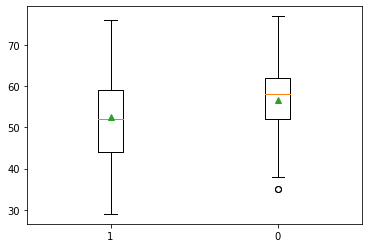

In [62]:
ht=heart_data.groupby(['target'])
print(ht.get_group(1))

age1=ht.get_group(1).iloc[:,0]
age0=ht.get_group(0).iloc[:,0]
#1 and 0 
age=[age1,age0]
print(age1)
print(age0)
plt.boxplot(age,labels=["1","0"],showmeans=True)
plt.show()












     chol
0     233
1     250
2     204
3     236
4     354
..    ...
160   240
161   342
162   157
163   175
164   175

[165 rows x 1 columns]
     chol
165   286
166   229
167   268
168   254
169   203
..    ...
298   241
299   264
300   193
301   131
302   236

[138 rows x 1 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


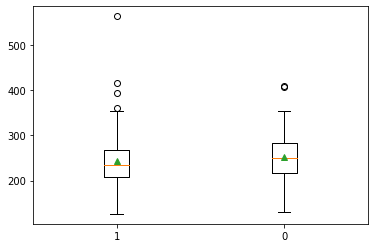

In [61]:
age1=ht.get_group(1).iloc[:,4:5]
age0=ht.get_group(0).iloc[:,4:5]
#1 and 0 
age=[age1,age0]
print(age1)
print(age0)
plt.boxplot(age,labels=["1","0"],showmeans=True)
plt.show()

     thalach
0        150
1        187
2        172
3        178
4        163
..       ...
160      169
161      166
162      182
163      173
164      173

[165 rows x 1 columns]
     thalach
165      108
166      129
167      160
168      147
169      155
..       ...
298      123
299      132
300      141
301      115
302      174

[138 rows x 1 columns]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


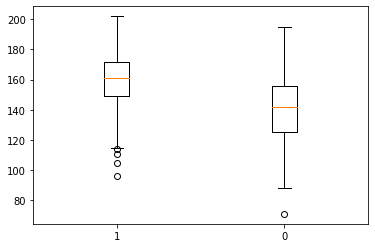

In [63]:
age1=ht.get_group(1).iloc[:,7:8]
age0=ht.get_group(0).iloc[:,7:8]
#1 and 0 
age=[age1,age0]
print(age1)
print(age0)
plt.boxplot(age,labels=["1","0"])
plt.show()


In [3]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data.shape

(303, 14)

In [13]:
heart_data.keys()


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
heart_data['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

1 means Defective heart 

0 means proper heart

In [20]:
X=heart_data.drop(['target'],axis=1,inplace=False)

Y=heart_data['target']
print(X)
print(Y)

     

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,stratify=Y,random_state=1)
print(X_train)
print(Y_train)
print(Y_train.value_counts())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
212   39    1   0       118   219    0        1      140      0      1.2   
8     52    1   2       172   199    1        1      162      0      0.5   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
116   41    1   2       130   214    0        0      168      0      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
198   62    1   0       120   267    0        1       99      1      1.8   
167   62    0   0       140   268    0        0      160      0      3.6   
196   46    1   2       150   231    0        1      147      0      3.6   
191   58    1   0       128   216    0        0      131      1      2.2   
192   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
212      1   0     3  
8        2   0     3  
4        2   0    

In [24]:

model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Our triained model now predicts the values on X_train , then we compare this levels with our axat values
X_train_prediction =model.predict(X_train)
accuracy_level=accuracy_score(X_train_prediction,Y_train)
print("Accuracy Level :",(accuracy_level)*100,"%")

Accuracy Level : 84.55882352941177 %


In [26]:
#Testing our heart disease predictor
Y_test_prediction =model.predict(X_test)
accuracy_level=accuracy_score(Y_test_prediction,Y_test)
print("Accuracy Level :",(accuracy_level)*100,"%")

Accuracy Level : 93.54838709677419 %


In [31]:
input_data=(54,1,0,110,206,0,0,108,1,0,1,1,2,)
input_numpy_array=np.asarray(input_data)
#now the input numpy has 60 elements without orientation 
print(input_numpy_array.shape)
#reshaping in one row . -1 means calculate colums accordingly but everything in one row
input_reshape=input_numpy_array.reshape(1,-1)
print(input_reshape.shape)

answer=model.predict(input_reshape)
print (answer)
accuracy_level=accuracy_score(model.predict(input_reshape),[1])
print(accuracy_level)
if(answer[0]==1): 
  print("Heart Attack is here ")
else:
  print ("Fine Heart ")

(13,)
(1, 13)
[0]
0.0
Fine Heart 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
